In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

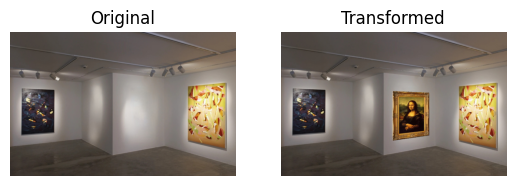

In [48]:
gallery = cv.imread('../images/gallery.png')
mona_lisa = cv.imread('../images/mona_lisa.jpg')
painting = cv.imread('../images/painting.jpg')
y_start = 350
x_start = 650
scale_factor = 0.6

flat_image = mona_lisa
# Define the coordinates of the four corners of the flat image
flat_corners = np.array([[0, 0], [flat_image.shape[1] - 1, 0], [0, flat_image.shape[0] - 1], [flat_image.shape[1] - 1, flat_image.shape[0] - 1]], dtype='float32')
# Define the vertical perspective transformation
vertical_perspective_corners = np.array([[0, 0], [flat_image.shape[1] - 1, 15], [0, flat_image.shape[0] - 1], [flat_image.shape[1] - 1, flat_image.shape[0] - 51]], dtype='float32')
# Compute the vertical perspective transformation matrix
vertical_matrix = cv.getPerspectiveTransform(flat_corners, vertical_perspective_corners)
# Apply the vertical perspective transformation
vertical_perspective_image = cv.warpPerspective(flat_image, vertical_matrix, (flat_image.shape[1], flat_image.shape[0]))

img1 = gallery.copy()
img2 = vertical_perspective_image.copy()

original_height, original_width = img2.shape[:2]

new_height = int(original_height * scale_factor)
new_width = int(original_width * scale_factor)
img2 = cv.resize(img2, (new_width, new_height))

rows,cols,channels = img2.shape
roi = img1[y_start:y_start+rows, x_start:x_start+cols ]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
dst = cv.add(img1_bg,img2_fg)
img1[y_start:y_start+rows, x_start:x_start+cols ] = dst
# Display the result
cv.imwrite('add_monaLisa.png',img1)
plt.subplot(121),plt.axis('off'), plt.imshow(cv.cvtColor(gallery, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122),plt.axis('off'), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), plt.title('Transformed')
plt.show()

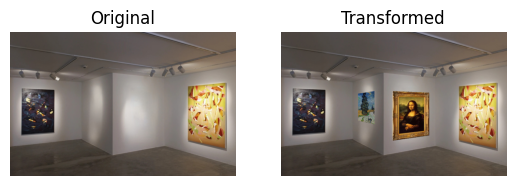

In [49]:
y_start = 350
x_start = 450
scale_factor = 0.3

flat_image = painting
# Define the coordinates of the four corners of the flat image
flat_corners = np.array([[0, 0], [flat_image.shape[1] - 1, 0], [0, flat_image.shape[0] - 1], [flat_image.shape[1] - 1, flat_image.shape[0] - 1]], dtype='float32')
# Define the vertical perspective transformation
vertical_perspective_corners = np.array([[0, 50], [flat_image.shape[1] - 1, 0], [0, flat_image.shape[0] - 70], [flat_image.shape[1] - 1, flat_image.shape[0]]], dtype='float32')
# Compute the vertical perspective transformation matrix
vertical_matrix = cv.getPerspectiveTransform(flat_corners, vertical_perspective_corners)
# Apply the vertical perspective transformation
vertical_perspective_image = cv.warpPerspective(flat_image, vertical_matrix, (flat_image.shape[1], flat_image.shape[0]))

#img1 = gallery.copy()
img2 = vertical_perspective_image.copy()

original_height, original_width = img2.shape[:2]

new_height = int(original_height * scale_factor)
new_width = int(original_width * scale_factor)
img2 = cv.resize(img2, (new_width, new_height))

rows,cols,channels = img2.shape
roi = img1[y_start:y_start+rows, x_start:x_start+cols ]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 1, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
dst = cv.add(img1_bg,img2_fg)
img1[y_start:y_start+rows, x_start:x_start+cols ] = dst
# Display the result
cv.imwrite('add_monaLisa.png',img1)
plt.subplot(121),plt.axis('off'), plt.imshow(cv.cvtColor(gallery, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122),plt.axis('off'), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), plt.title('Transformed')
plt.show()